In [1]:
import requests
import json
import datetime
import pandas as pd
import os

In [2]:
df = pd.read_csv("final_engineered_features.csv")
df.info()

/var/folders/zd/m28s52w527q6_ph_ys2vzb380000gn/T/ipykernel_90485/2519069260.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_engineered_features.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314488 entries, 0 to 314487
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FEI Number                  314488 non-null  int64  
 1   Legal Name                  314488 non-null  object 
 2   City                        314487 non-null  object 
 3   State                       314488 non-null  object 
 4   Zip                         314488 non-null  object 
 5   Country/Area                314488 non-null  object 
 6   Fiscal Year                 314488 non-null  int64  
 7   Inspection ID               314488 non-null  int64  
 8   Posted Citations            314488 non-null  object 
 9   Inspection End Date         314488 non-null  object 
 10  Classification              314488 non-null  object 
 11  Project Area                314488 non-null  object 
 12  Product Type                314488 non-null  object 
 13  Additional Det

In [3]:
df.head()

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,...,FMD-145 Date,recalled_bool,classification_flag,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,inspection_season,days_since_last_inspection
0,319,Wei Chuan Taichung Factory,Taichung,-,-,Taiwan,2010,618345,Yes,2009-10-05,...,-,0,1,2009,10,0,4,41,Fall,-1.0
1,360,DSP,Chauny,-,-,France,2012,776513,No,2012-03-22,...,2012-10-15 00:00:00,0,1,2012,3,3,1,12,Spring,-1.0
2,360,DSP,Chauny,-,-,France,2015,945254,No,2015-09-18,...,2016-01-04 00:00:00,0,0,2015,9,4,3,38,Fall,1275.0
3,360,DSP,Chauny,-,-,France,2019,1123946,No,2019-06-27,...,2020-06-09 00:00:00,0,1,2019,6,3,2,26,Summer,1378.0
4,360,DSP,Chauny,-,-,France,2022,1269324,No,2022-06-03,...,-,0,1,2022,6,4,2,22,Summer,1072.0


In [4]:
df['Inspection End Date'] = pd.to_datetime(df['Inspection End Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314488 entries, 0 to 314487
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   FEI Number                  314488 non-null  int64         
 1   Legal Name                  314488 non-null  object        
 2   City                        314487 non-null  object        
 3   State                       314488 non-null  object        
 4   Zip                         314488 non-null  object        
 5   Country/Area                314488 non-null  object        
 6   Fiscal Year                 314488 non-null  int64         
 7   Inspection ID               314488 non-null  int64         
 8   Posted Citations            314488 non-null  object        
 9   Inspection End Date         314488 non-null  datetime64[ns]
 10  Classification              314488 non-null  object        
 11  Project Area                314488 non-

In [6]:
df = df[df['Product Type'] == 'Food/Cosmetics']
df.head()

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,...,FMD-145 Date,recalled_bool,classification_flag,inspection_year,inspection_month,inspection_dayofweek,inspection_quarter,week_of_year,inspection_season,days_since_last_inspection
0,319,Wei Chuan Taichung Factory,Taichung,-,-,Taiwan,2010,618345,Yes,2009-10-05,...,-,0,1,2009,10,0,4,41,Fall,-1.0
130,8044,Productos Frescamar S.A. De C.V.,Ensenada,-,-,Mexico,2009,626338,No,2009-08-03,...,-,0,0,2009,8,0,3,32,Summer,-1.0
131,8103,Tropical Food Industries Company Limited,Mueang Samut Sakhon,-,-,Thailand,2023,1206614,No,2023-05-17,...,2023-06-23 00:00:00,0,0,2023,5,2,2,20,Spring,-1.0
132,8103,Tropical Food Industries Company Limited,Mueang Samut Sakhon,-,-,Thailand,2023,1206614,No,2023-05-17,...,2023-06-23 00:00:00,0,0,2023,5,2,2,20,Spring,0.0
133,8140,"Modesto Carrodeguas, S.L.",Carino,-,-,Spain,2012,771563,Yes,2012-02-21,...,2012-07-31 00:00:00,0,1,2012,2,1,1,8,Winter,-1.0


In [7]:
result = (
    df.groupby(['Inspection End Date', 'recalled_bool'])
    .size()
    .reset_index(name='count')
)

In [8]:
result.tail()

,Inspection End Date,recalled_bool,count
8410,2025-05-29,0,8
8411,2025-05-29,1,2
8412,2025-05-30,0,2
8413,2025-06-02,0,4
8414,2025-06-04,0,1


In [9]:
result[result['Inspection End Date'] == pd.to_datetime('2025-05-29')]

,Inspection End Date,recalled_bool,count
8410,2025-05-29,0,8
8411,2025-05-29,1,2


In [10]:
result[result['Inspection End Date'] == pd.to_datetime('2025-05-28')]

,Inspection End Date,recalled_bool,count
8408,2025-05-28,0,9
8409,2025-05-28,1,1


In [11]:
# create a dataframe that gives the percentage of product recalls  = number of recalled/ number of total inspection
pivoted = result.pivot(index='Inspection End Date', columns='recalled_bool', values='count').fillna(0)

# Ensure both 0 and 1 columns exist even if one is missing for some dates
if 0 not in pivoted.columns:
    pivoted[0] = 0
if 1 not in pivoted.columns:
    pivoted[1] = 0

# Compute recall percentage
pivoted['Recall Percentage'] = (pivoted[1] / (pivoted[0] + pivoted[1])) * 100

# Reset index and keep only the desired columns
recall_percentage_df = pivoted.reset_index()[['Inspection End Date', 'Recall Percentage']]

In [12]:
recall_percentage_df.head(20)

recalled_bool,Inspection End Date,Recall Percentage
0,2008-10-01,0.000000
1,2008-10-02,0.000000
2,2008-10-03,0.000000
3,2008-10-05,0.000000
4,2008-10-06,23.076923
5,2008-10-07,17.647059
6,2008-10-08,19.230769
7,2008-10-09,6.250000
8,2008-10-10,33.333333
9,2008-10-13,100.000000


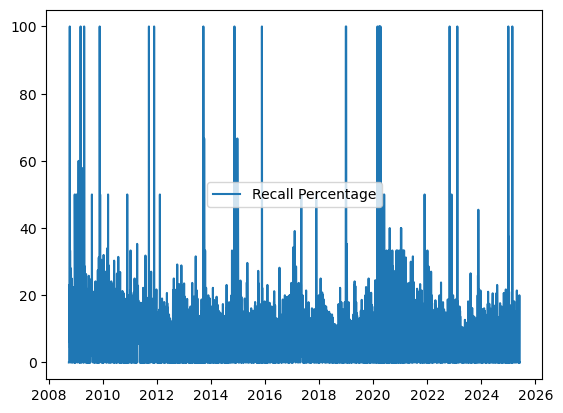

In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(recall_percentage_df.iloc[:,0], recall_percentage_df.iloc[:, 1], label = 'Recall Percentage')
plt.legend()
plt.show()

In [14]:
recall_percentage_df[recall_percentage_df['Inspection End Date'] == pd.to_datetime('2025-05-29')]

recalled_bool,Inspection End Date,Recall Percentage
4707,2025-05-29,20.0


In [15]:
# Recalls by Inspection End Month
# Step 1: Create 'Inspection End Month' from 'Inspection End Date'
df['Inspection End Month'] = df['Inspection End Date'].dt.to_period('M')

# Step 2: Group by 'Inspection End Month' and 'recalled_bool' to count occurrences
monthly_counts = (
    df.groupby(['Inspection End Month', 'recalled_bool'])
    .size()
    .reset_index(name='count')
)

# Step 3: Pivot to get separate columns for recalled_bool == 0 and == 1
pivoted = monthly_counts.pivot(
    index='Inspection End Month',
    columns='recalled_bool',
    values='count'
).fillna(0)

# Ensure both 0 and 1 columns exist
if 0 not in pivoted.columns:
    pivoted[0] = 0
if 1 not in pivoted.columns:
    pivoted[1] = 0

# Step 4: Calculate Recall Percentage
pivoted['Recall Percentage'] = (pivoted[1] / (pivoted[0] + pivoted[1])) * 100

# Step 5: Convert Period to Timestamp (e.g., 2023-01 → 2023-01-01)
pivoted = pivoted.reset_index()
pivoted['Inspection End Month'] = pivoted['Inspection End Month'].dt.to_timestamp()

# Step 6: Keep only necessary columns
monthly_recall_percentage = pivoted[['Inspection End Month', 'Recall Percentage']]

In [16]:
monthly_recall_percentage.head(20)

recalled_bool,Inspection End Month,Recall Percentage
0,2008-10-01,16.593886
1,2008-11-01,14.141414
2,2008-12-01,10.266940
3,2009-01-01,13.342898
4,2009-02-01,19.554031
5,2009-03-01,19.411765
6,2009-04-01,17.647059
7,2009-05-01,13.149847
8,2009-06-01,14.299803
9,2009-07-01,13.120900


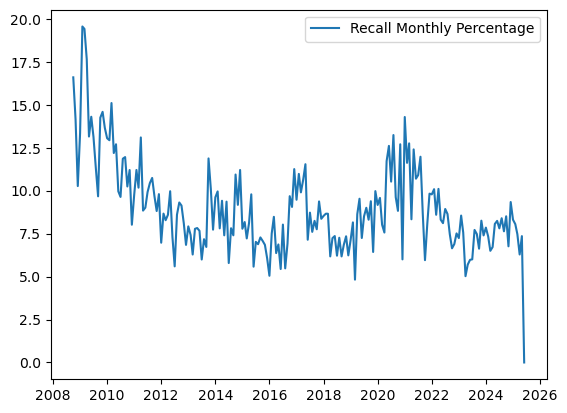

In [17]:
register_matplotlib_converters()
plt.plot(monthly_recall_percentage.iloc[:,0], monthly_recall_percentage.iloc[:, 1], label = 'Recall Monthly Percentage')
plt.legend()
plt.show()

In [18]:
# Do a timesplit of monthly_recall_percentage
! pip install --upgrade scikit-learn

In [19]:
from sklearn.model_selection import TimeSeriesSplit

kfold = TimeSeriesSplit(n_splits=5, test_size=12)
for train_index, test_index in kfold.split(monthly_recall_percentage):
    print('TRAIN INDEX:', train_index)
    print('TEST INDEX:', test_index)
    print()
    print()

TRAIN INDEX: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140]
TEST INDEX: [141 142 143 144 145 146 147 148 149 150 151 152]


TRAIN INDEX: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82 

In [20]:
monthly_recall_percentage['Inspection End Month']

0     2008-10-01
1     2008-11-01
2     2008-12-01
3     2009-01-01
4     2009-02-01
         ...    
196   2025-02-01
197   2025-03-01
198   2025-04-01
199   2025-05-01
200   2025-06-01
Name: Inspection End Month, Length: 201, dtype: datetime64[ns]

/var/folders/zd/m28s52w527q6_ph_ys2vzb380000gn/T/ipykernel_90485/1332924336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month


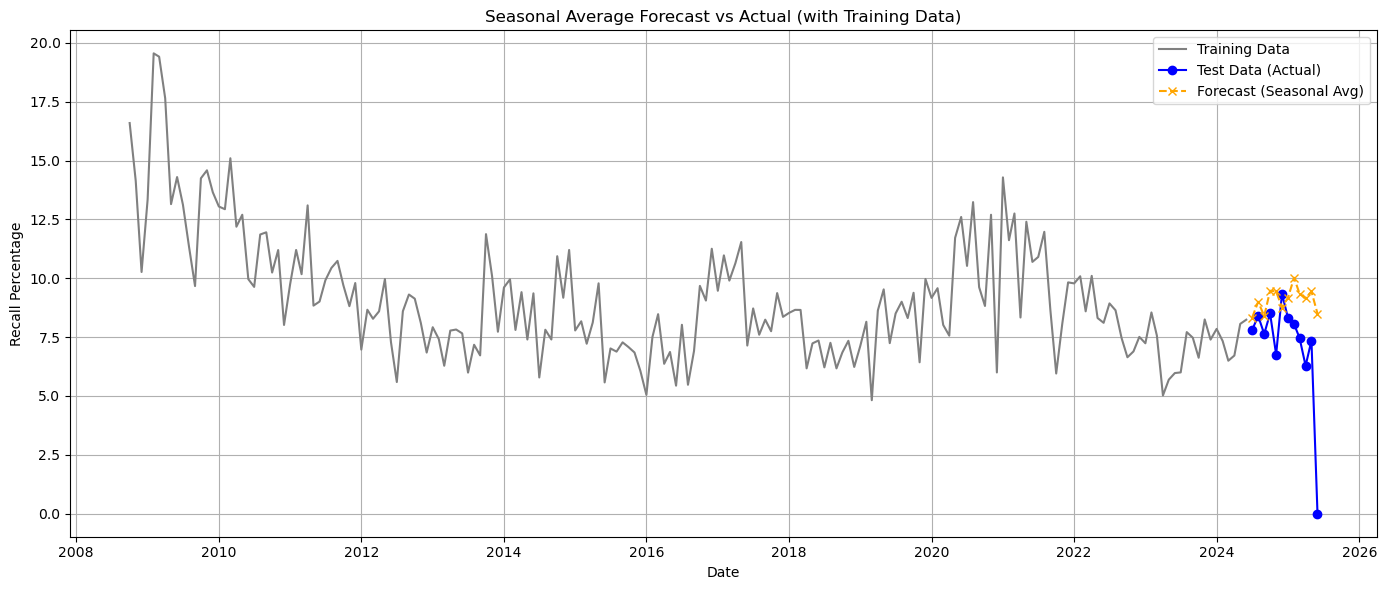

In [21]:
# Step 1: Set datetime index
df = monthly_recall_percentage.copy()
df.set_index('Inspection End Month', inplace=True)

# Step 2: Time series split
test_size = 12
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

# Step 3: Create seasonal averages from training data
train['month'] = train.index.month
seasonal_avg = train.groupby('month')['Recall Percentage'].mean()

# Step 4: Predict each test point using corresponding month’s average
test_months = test.index.month
predicted = test_months.map(seasonal_avg)

# Step 5: Plot
plt.figure(figsize=(14, 6))

# Plot training data
plt.plot(train.index, train['Recall Percentage'], label='Training Data', color='gray')

# Plot test actual
plt.plot(test.index, test['Recall Percentage'], label='Test Data (Actual)', marker='o', linestyle='-', color='blue')

# Plot test forecast
plt.plot(test.index, predicted.values, label='Forecast (Seasonal Avg)', marker='x', linestyle='--', color='orange')

# Formatting
plt.xlabel('Date')
plt.ylabel('Recall Percentage')
plt.title('Seasonal Average Forecast vs Actual (with Training Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/zd/m28s52w527q6_ph_ys2vzb380000gn/T/ipykernel_90485/1152845747.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month


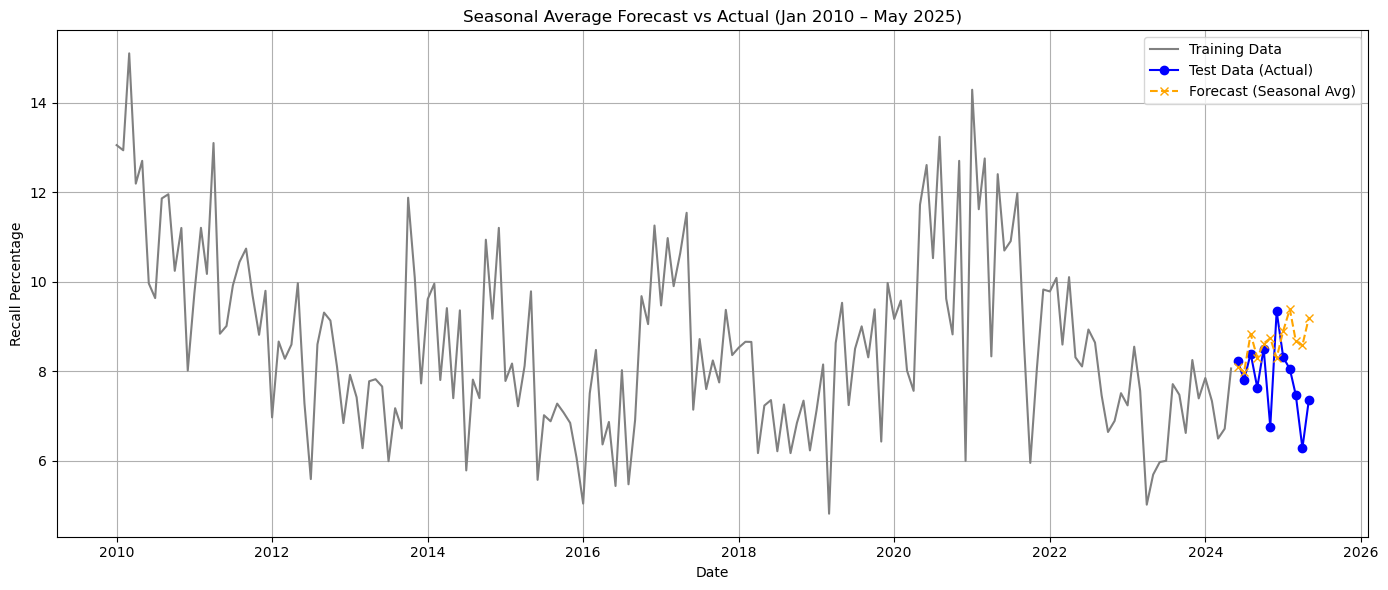

In [22]:
# Step 0: Copy and filter between Jan 2010 and May 2025 (inclusive)
df = monthly_recall_percentage.copy()
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2025-05-31')  # Use end of May to include all of May
df = df[(df['Inspection End Month'] >= start_date) & (df['Inspection End Month'] <= end_date)]
df.set_index('Inspection End Month', inplace=True)

# Step 1: Time series split
test_size = 12
train = df.iloc[:-test_size]
test = df.iloc[-test_size:]

# Step 2: Create seasonal averages from training data
train['month'] = train.index.month
seasonal_avg = train.groupby('month')['Recall Percentage'].mean()

# Step 3: Predict test set using seasonal averages
test_months = test.index.month
predicted = test_months.map(seasonal_avg)

# Step 4: Plot all
plt.figure(figsize=(14, 6))

# Plot training data
plt.plot(train.index, train['Recall Percentage'], label='Training Data', color='gray')

# Plot actual test data
plt.plot(test.index, test['Recall Percentage'], label='Test Data (Actual)', marker='o', linestyle='-', color='blue')

# Plot forecast
plt.plot(test.index, predicted.values, label='Forecast (Seasonal Avg)', marker='x', linestyle='--', color='orange')

# Formatting
plt.xlabel('Date')
plt.ylabel('Recall Percentage')
plt.title('Seasonal Average Forecast vs Actual (Jan 2010 – May 2025)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

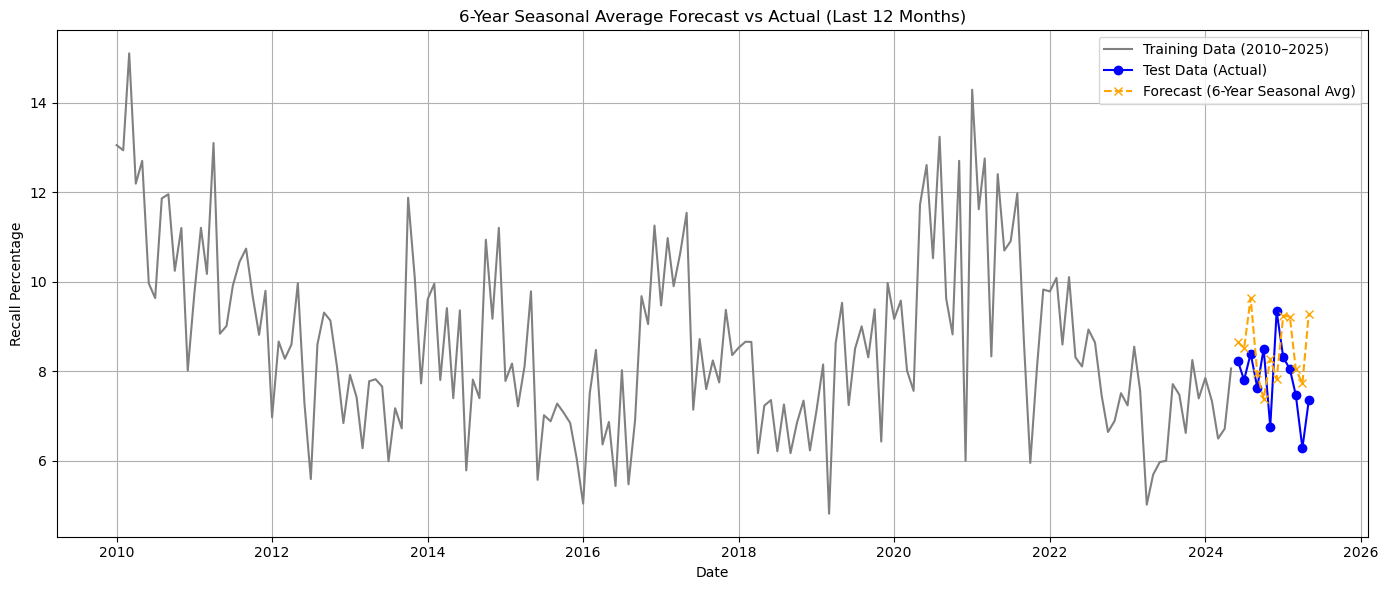

In [23]:
# Step 1: Filter data from Jan 2010 to May 2025 (inclusive)
df = monthly_recall_percentage.copy()
df = df[(df['Inspection End Month'] >= '2010-01-01') & (df['Inspection End Month'] <= '2025-05-31')]
df.set_index('Inspection End Month', inplace=True)

# Step 2: Split into train and test (last 12 months)
test_size = 12
train = df.iloc[:-test_size].copy()
test = df.iloc[-test_size:].copy()

# Add 'year' and 'month' columns to train
train['year'] = train.index.year
train['month'] = train.index.month

# Step 3: Forecast using 6-year seasonal average
forecast_values = []

for test_month in test.index:
    month = test_month.month
    year = test_month.year

    # Filter train data for same month in the 6 previous years
    seasonal_slice = train[
        (train['month'] == month) &
        (train['year'] >= year - 6) &
        (train['year'] < year)
    ]

    # Compute the average (may result in NaN if insufficient data)
    avg = seasonal_slice['Recall Percentage'].mean()
    forecast_values.append(avg)

# Step 4: Plot
plt.figure(figsize=(14, 6))

# Plot training data
plt.plot(train.index, train['Recall Percentage'], label='Training Data (2010–2025)', color='gray')

# Plot actual test data
plt.plot(test.index, test['Recall Percentage'], label='Test Data (Actual)', marker='o', linestyle='-', color='blue')

# Plot forecast
plt.plot(test.index, forecast_values, label='Forecast (6-Year Seasonal Avg)', marker='x', linestyle='--', color='orange')

# Formatting
plt.xlabel('Date')
plt.ylabel('Recall Percentage')
plt.title('6-Year Seasonal Average Forecast vs Actual (Last 12 Months)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

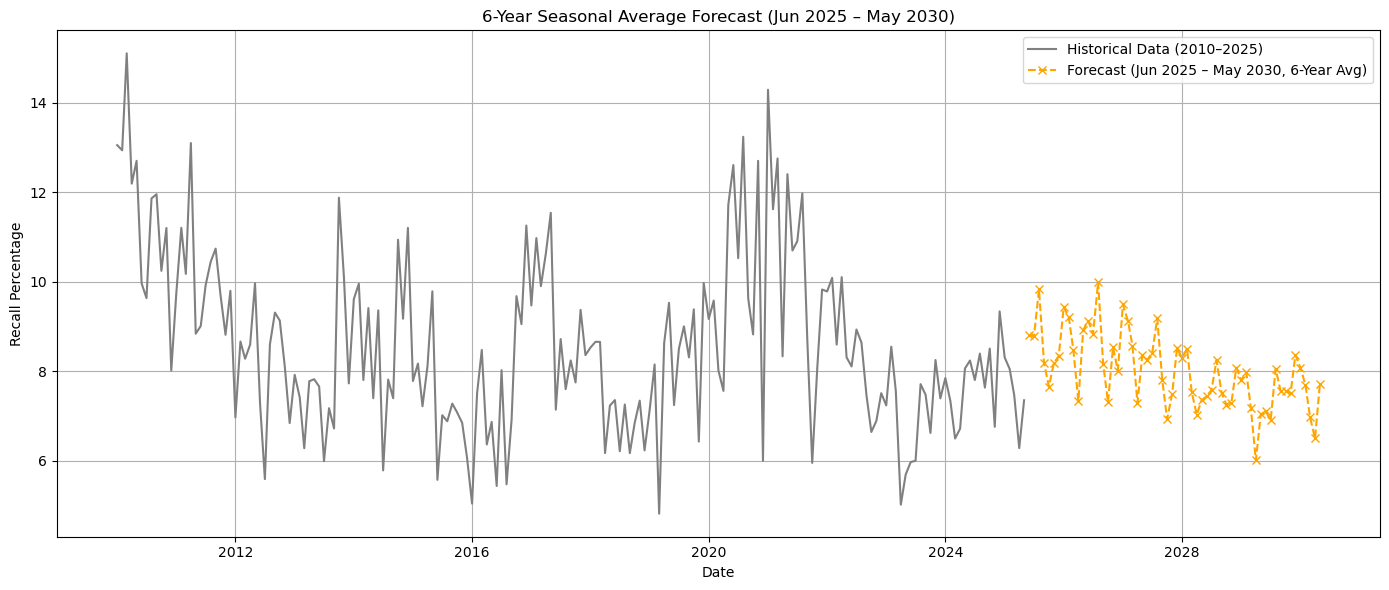

In [24]:
# Step 1: Load and filter historical data from Jan 2010 to May 2025
df = monthly_recall_percentage.copy()
df = df[(df['Inspection End Month'] >= '2010-01-01') & (df['Inspection End Month'] <= '2025-05-31')]
df.set_index('Inspection End Month', inplace=True)

# Add helper columns
df['year'] = df.index.year
df['month'] = df.index.month

# Step 2: Define forecast period: Jun 2025 – May 2030 (60 months)
forecast_months = pd.date_range(start='2025-06-01', end='2030-05-01', freq='MS')

# Step 3: Seasonal forecast using previous 6 years of same month
forecast_values = []

for target_date in forecast_months:
    target_month = target_date.month
    target_year = target_date.year

    # Filter for the same calendar month in the previous 6 years
    seasonal_slice = df[
        (df['month'] == target_month) &
        (df['year'] >= target_year - 6) &
        (df['year'] < target_year)
    ]

    # Compute seasonal average for this calendar month
    avg = seasonal_slice['Recall Percentage'].mean()
    forecast_values.append(avg)

# Step 4: Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Inspection End Month': forecast_months,
    'Forecast Recall Percentage': forecast_values
}).set_index('Inspection End Month')

# Step 5: Plot training data and forecast
plt.figure(figsize=(14, 6))

# Plot historical data
plt.plot(df.index, df['Recall Percentage'], label='Historical Data (2010–2025)', color='gray')

# Plot forecast
plt.plot(forecast_df.index, forecast_df['Forecast Recall Percentage'],
         label='Forecast (Jun 2025 – May 2030, 6-Year Avg)', linestyle='--', marker='x', color='orange')

# Formatting
plt.xlabel('Date')
plt.ylabel('Recall Percentage')
plt.title('6-Year Seasonal Average Forecast (Jun 2025 – May 2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
print(monthly_recall_percentage)
monthly_recall_percentage.to_csv('monthly_recall_percentage.csv', index=False)

recalled_bool Inspection End Month  Recall Percentage
0                       2008-10-01          16.593886
1                       2008-11-01          14.141414
2                       2008-12-01          10.266940
3                       2009-01-01          13.342898
4                       2009-02-01          19.554031
..                             ...                ...
196                     2025-02-01           8.050847
197                     2025-03-01           7.468477
198                     2025-04-01           6.285178
199                     2025-05-01           7.352941
200                     2025-06-01           0.000000

[201 rows x 2 columns]
